# Basic Supervised Linear Models

## Import Pacakges

In [1]:
import tensorflow as tf
import torch
from torch.utils import data
from torch import nn

import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib import cm

plt.rcParams["figure.figsize"] = (8, 8)

In [2]:
print(tf.__version__)

2.8.0


In [3]:
print(torch.__version__)

1.8.0


* https://www.tensorflow.org/tutorials/keras/regression
* https://adamoudad.github.io/posts/keras_torch_comparison/syntax/

## Problem - Regression

### Global Variables

In [4]:
LEARNING_RATE = 0.03
NUM_EPOCHS = 5
BATCH_SIZE = 8
INIT_STDDEV = 0.01 # model weights - random initialisation from normal distribution
NUM_EXAMPLES = 1000
CMAP = "plasma" # colour map

### Data Preparation

In [5]:
def generate_synthetic_linear_data(w, b, num_examples):
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

In [6]:
true_w = tf.constant([2.0, -3.0])
true_b = 4.0
features, labels = generate_synthetic_linear_data(true_w, true_b, NUM_EXAMPLES)

Metal device set to: Apple M1 Pro


2022-04-21 17:48:08.116818: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-21 17:48:08.116960: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
features[:BATCH_SIZE], labels[:BATCH_SIZE]

(<tf.Tensor: shape=(8, 2), dtype=float32, numpy=
 array([[ 0.49819988,  0.26167566],
        [ 0.50835073,  0.66266036],
        [ 0.39945233,  1.7223704 ],
        [ 0.05216664, -0.04732446],
        [ 0.9355902 ,  0.09843853],
        [-1.8547513 ,  0.18512383],
        [ 0.86756206,  0.48787257],
        [ 0.09033983,  0.6811939 ]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 4.218138  ],
        [ 3.0381043 ],
        [-0.37223765],
        [ 4.2388263 ],
        [ 5.5872264 ],
        [-0.25500798],
        [ 4.2721395 ],
        [ 2.128608  ]], dtype=float32)>)

In [8]:
X = np.array(features); y = np.array(labels)

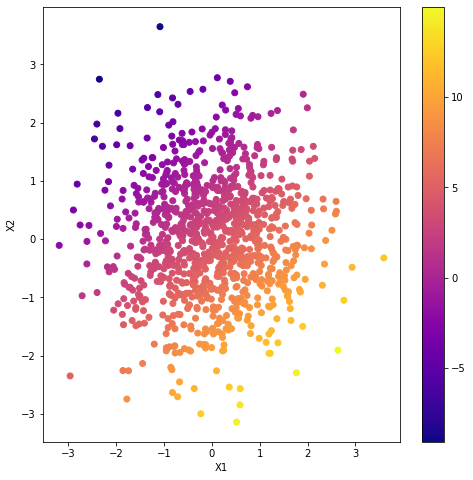

In [9]:
fig, ax = plt.subplots()
points = ax.scatter(X[:,0], X[:, 1], c=y, cmap=CMAP)
plt.xlabel("X1")
plt.ylabel("X2")
fig.colorbar(points)

In [10]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """Construct a TensorFlow data iterator."""
    dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
    if is_train:
        dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(batch_size)
    return dataset

In [11]:
data_iter = load_array((features, labels), BATCH_SIZE)

In [12]:
next(iter(data_iter))

(<tf.Tensor: shape=(8, 2), dtype=float32, numpy=
 array([[-0.32826585, -0.624103  ],
        [-0.54240763,  0.6486937 ],
        [-0.77148104, -1.8318863 ],
        [ 0.22389792,  0.82278204],
        [ 1.1405072 ,  0.7058091 ],
        [-0.15634336, -1.6258978 ],
        [-0.91431147, -1.3644891 ],
        [-0.18616125,  2.5733786 ]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 5.213985  ],
        [ 0.95619285],
        [ 7.959001  ],
        [ 1.9712979 ],
        [ 4.1691365 ],
        [ 8.569927  ],
        [ 6.2461214 ],
        [-4.099703  ]], dtype=float32)>)

---

In [8]:
def generate_synthetic_linear_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, torch.reshape(y, (-1, 1))

In [9]:
true_w = torch.tensor([2.0, -3.0])
true_b = 4.0
features, labels = generate_synthetic_linear_data(true_w, true_b, NUM_EXAMPLES)

In [10]:
features[:BATCH_SIZE], labels[:BATCH_SIZE]

(tensor([[-0.8709,  1.3806],
         [ 0.2399,  1.2924],
         [ 0.4397, -0.1730],
         [-0.8213, -0.9638],
         [-0.0828, -1.9842],
         [ 1.4869,  0.8752],
         [ 1.3431,  0.3002],
         [ 0.6629, -0.2908]]),
 tensor([[-1.8806],
         [ 0.6040],
         [ 5.4012],
         [ 5.2458],
         [ 9.7714],
         [ 4.3440],
         [ 5.7948],
         [ 6.1853]]))

In [11]:
X = np.array(features); y = np.array(labels)

In [14]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [15]:
data_iter = load_array((features, labels), BATCH_SIZE)

NameError: name 'data' is not defined

In [93]:
next(iter(data_iter))

[tensor([[-0.0657, -0.1107],
         [ 1.5656, -0.1040],
         [-0.1117,  1.7631],
         [ 1.4144, -0.9430],
         [ 2.2220, -0.3852],
         [ 1.3255, -1.3807],
         [-0.0439,  2.0420],
         [-1.1209, -1.8969]]),
 tensor([[ 4.2046],
         [ 7.4437],
         [-1.5116],
         [ 9.6566],
         [ 9.5990],
         [10.7831],
         [-2.2273],
         [ 7.4394]])]

### Model Training

#### TF Keras Sequential API 

Need to rerun tensorflow data prep part!

In [13]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [14]:
initializer = tf.initializers.RandomNormal(stddev=INIT_STDDEV)
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)

**Model architecture**

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(2, ), name='input'),
    tf.keras.layers.Dense(1, activation='linear', 
                          kernel_initializer=initializer,
                          name='dense')
])

In [16]:
# Alternatively
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(2, )))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


* The input layer can be ommited here and model can be fitted on input data at a later stage. This way however, `model.summary()` can only be called later when the input data shape is known to the object.
* Any types of feature preprocessing e.g. normalisation (`tf.keras.layers.Normalization`) or flatten (`tf.keras.layers.Flatten` in images) operations can also be included in the sequential steps as the initial layer.

In [18]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation='linear', 
                        kernel_initializer=initializer)
])

In [19]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

* Here we didn't define the input layer so naturally we cannot call `model.summary()` as the object doesn't know anything about the shape of the input data. However this will still work provided input is passed in the model training stage that follows

**Training process**

In [20]:
def train_batch(model, features, labels, batch_size, loss, num_epochs, optimizer):
    data_iter = load_array((features, labels), batch_size)
    for epoch in range(num_epochs):
        for X, y in data_iter:
            with tf.GradientTape() as tape:
                l = loss(model(X, training=True), y)
            grads = tape.gradient(l, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
        l = loss(model(features), labels)
        print(f'epoch {epoch + 1}, loss {l:f}')

In [21]:
train_batch(model, features, labels, BATCH_SIZE, loss, NUM_EPOCHS, optimizer)

epoch 1, loss 0.000106
epoch 2, loss 0.000095
epoch 3, loss 0.000096
epoch 4, loss 0.000095
epoch 5, loss 0.000095


**Training Process (Alternative)**

In [79]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['mse', rmse])
model.fit(data_iter,
          epochs=NUM_EPOCHS)

Epoch 1/5
 28/125 [=====>........................] - ETA: 0s - loss: 8.7392 - mse: 8.7392 - rmse: 2.6327  

2022-04-21 17:44:43.714873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 1s 4ms/step - loss: 2.0188 - mse: 2.0188 - rmse: 0.7092
Epoch 2/5
125/125 [==============================] - 0s 4ms/step - loss: 9.4456e-05 - mse: 9.4456e-05 - rmse: 0.0095
Epoch 3/5
125/125 [==============================] - 0s 4ms/step - loss: 9.4786e-05 - mse: 9.4786e-05 - rmse: 0.0095
Epoch 4/5
125/125 [==============================] - 0s 4ms/step - loss: 9.3757e-05 - mse: 9.3757e-05 - rmse: 0.0094
Epoch 5/5
125/125 [==============================] - 0s 4ms/step - loss: 9.4719e-05 - mse: 9.4719e-05 - rmse: 0.0095


**Results**

In [80]:
w = model.get_weights()[0]
print('error in estimating w', true_w - tf.reshape(w, true_w.shape))
b = model.get_weights()[1]
print('error in estimating b', true_b - b)

error in estimating w tf.Tensor([0.00019109 0.00045037], shape=(2,), dtype=float32)
error in estimating b [0.00023079]


In [81]:
print(w)
print(b)

[[ 1.9998089]
 [-3.0004504]]
[3.9997692]


#### TF Keras Functional API

**Model Architecture**

In [82]:
inputs = tf.keras.Input(shape=(2,))
outputs = tf.keras.layers.Dense(1)(inputs)

In [83]:
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="linear_model")
model.summary()

Model: "linear_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


**Training Process**

In [84]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['mse', rmse])
model.fit(data_iter,
          epochs=NUM_EPOCHS)

Epoch 1/5
 25/125 [=====>........................] - ETA: 0s - loss: 8.7610 - mse: 8.7610 - rmse: 2.7185  

2022-04-21 17:45:00.344618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 1s 4ms/step - loss: 1.8394 - mse: 1.8394 - rmse: 0.6924
Epoch 2/5
125/125 [==============================] - 0s 4ms/step - loss: 9.5053e-05 - mse: 9.5053e-05 - rmse: 0.0095
Epoch 3/5
125/125 [==============================] - 0s 4ms/step - loss: 9.5042e-05 - mse: 9.5042e-05 - rmse: 0.0094
Epoch 4/5
125/125 [==============================] - 0s 4ms/step - loss: 9.4339e-05 - mse: 9.4339e-05 - rmse: 0.0094
Epoch 5/5
125/125 [==============================] - 0s 4ms/step - loss: 9.4757e-05 - mse: 9.4757e-05 - rmse: 0.0094


In [85]:
w = model.get_weights()[0]
print('error in estimating w', true_w - tf.reshape(w, true_w.shape))
b = model.get_weights()[1]
print('error in estimating b', true_b - b)

error in estimating w tf.Tensor([0.00047648 0.00010657], shape=(2,), dtype=float32)
error in estimating b [-0.00039101]


In [86]:
print(w)
print(b)

[[ 1.9995235]
 [-3.0001066]]
[4.000391]


#### Pytorch 

References
* https://pytorch.org/docs/stable/generated/torch.nn.Module.html
* https://medium.com/biaslyai/pytorch-linear-and-logistic-regression-models-5c5f0da2cb9
* https://medium.com/biaslyai/pytorch-introduction-to-neural-network-feedforward-neural-network-model-e7231cff47cb

Need to rerun Pytorch data prep part first!

In [94]:
model = nn.Sequential(nn.Linear(2, 1))

In [95]:
# Optional - initialise model weights
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=INIT_STDDEV)

model.apply(init_weights)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [96]:
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [97]:
def train_batch(model, train_iter, loss, num_epochs, optimizer):
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(model(X) ,y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        l = loss(model(features), labels)
        print(f'epoch {epoch + 1}, loss {l:f}')

In [98]:
train_batch(model, data_iter, loss, NUM_EPOCHS, optimizer)

epoch 1, loss 0.000121
epoch 2, loss 0.000102
epoch 3, loss 0.000104
epoch 4, loss 0.000103
epoch 5, loss 0.000105


In [99]:
w = model[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = model[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-0.0008, -0.0001])
error in estimating b: tensor([-0.0010])


In [100]:
print(w)
print(b)

tensor([[ 2.0008, -2.9999]])
tensor([4.0010])
